## 목표 : 실제 Class 대비 얼마나 잘 맞혔는가?

### Confusion Matrix
- 실제 라벨과 예측 라벨의 일치 개수를 Matrix 형태로 표현하는 기법
- Classification 성능 측정의 핵심
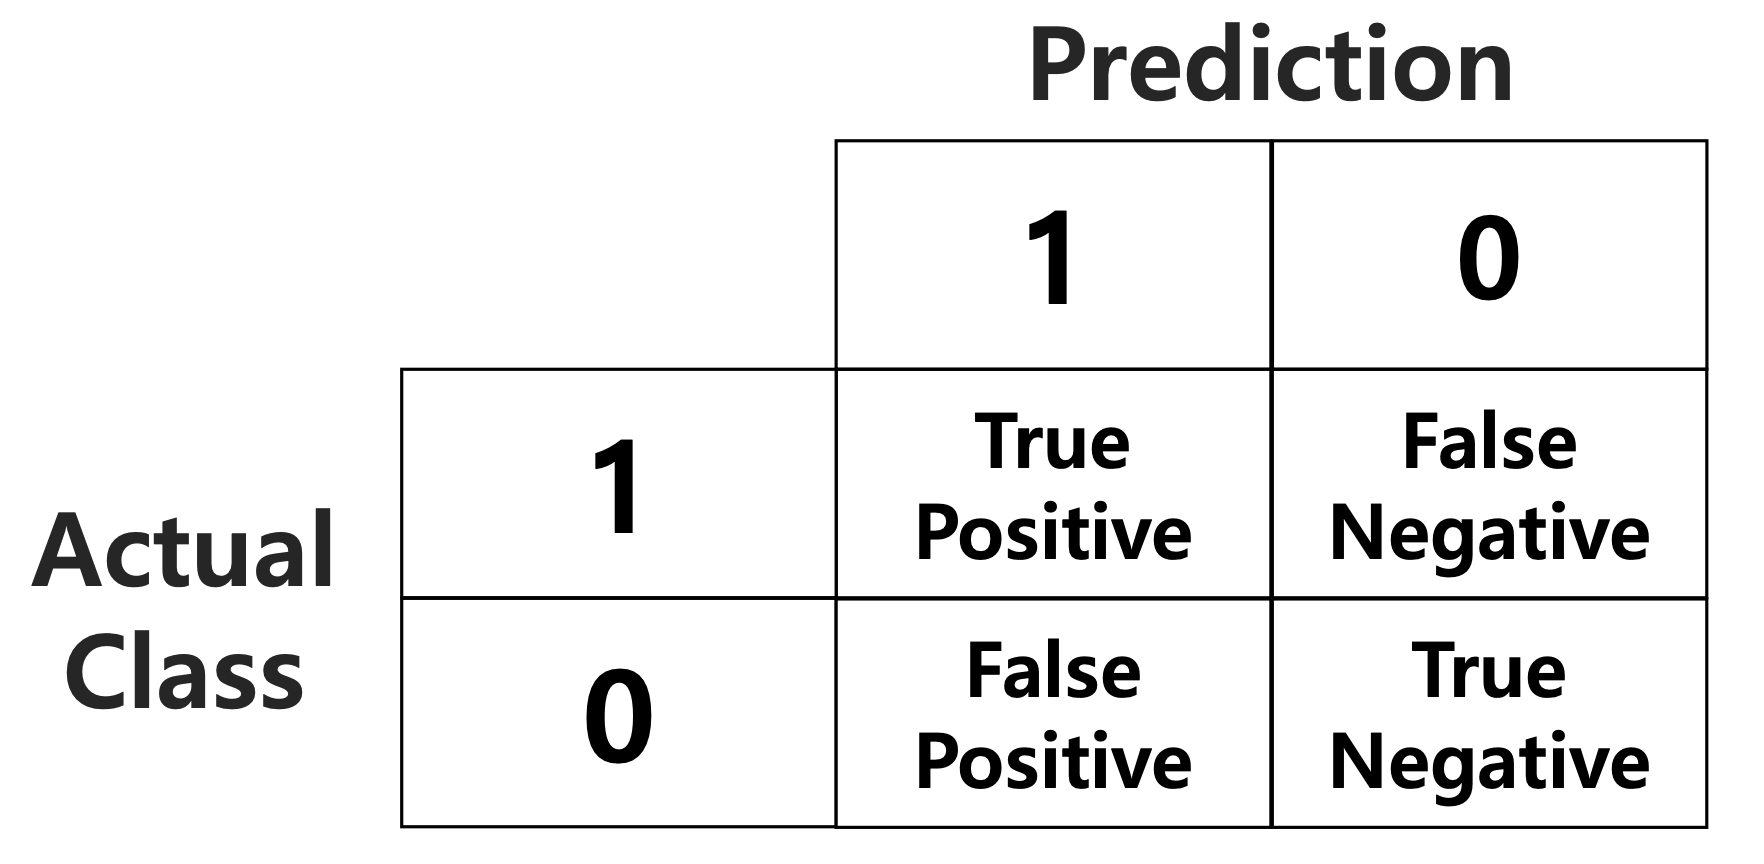
1. True Positive(TP) : 실제 결과 참(1)에 대한 예측이 맞음
	- True : 예측이 맞음
	- Positive : 참(1)인 경우
2. True Negative(TN) : 실제 결과 거짓(0)에 대한 예측이 맞음
	- True : 예측이 맞음
	- Negative : 거짓(0)인 경우
3. False Positive(FP) : 실제 결과 참(1)에 대한 예측이 틀림
	- False : 예측이 틀림
	- Positive : 참(1)인 경우
4. False Negative(FN) : 실제 결과 거짓(0)에 대한 예측이 틀림
	- False : 예측이 틀림
	- Negative : 거짓(0)인 경우

In [1]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]])

In [2]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(2, 0, 1, 3)

### 정확도(Accuracy, ACC)
- 전체 데이터 대비 정확하게 예측한 개수의 비율
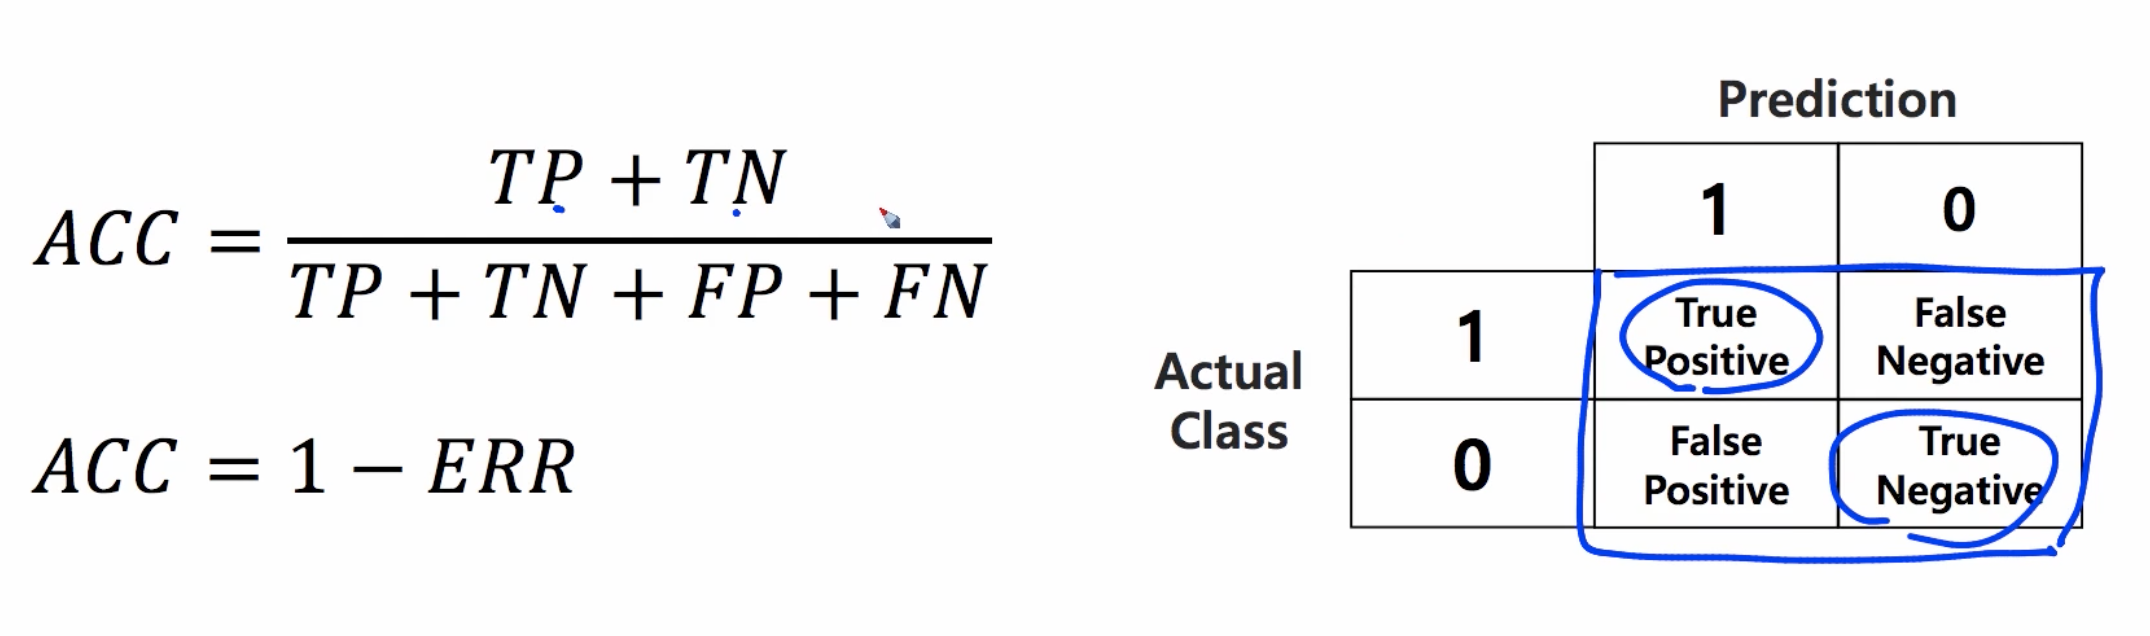

### 오차율(Error Rate, ERR)
- 전체 데이터 대비 부정확하게 예측한 개수의 비율(Accuracy와 반대개념)
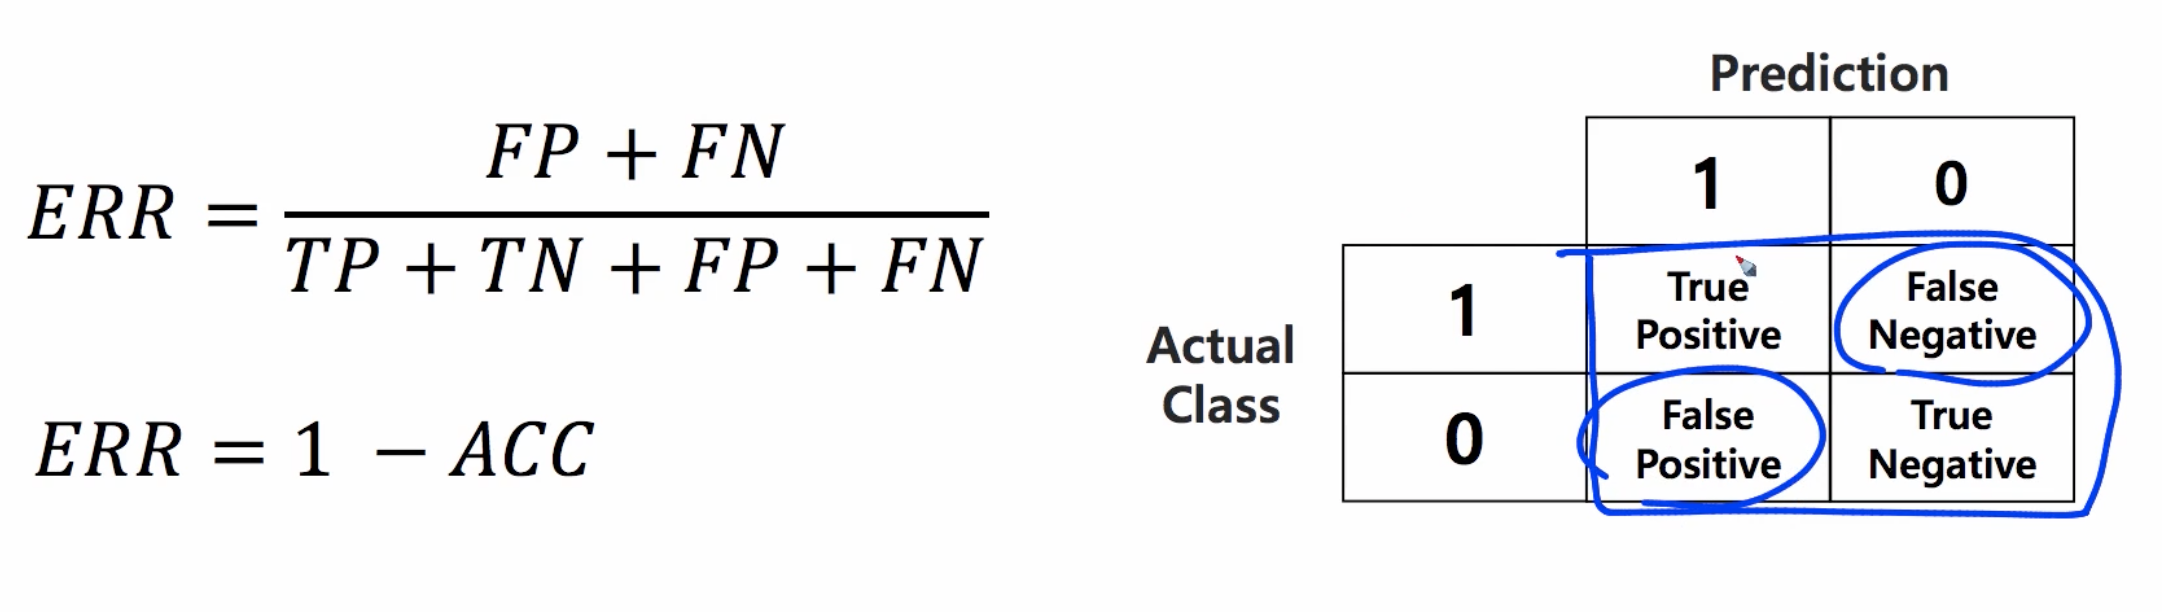

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [4]:
sum(y_true == y_pred) / len(y_true)

0.75

In [5]:
accuracy_score(y_true, y_pred)

0.75

In [6]:
accuracy_score(y_true, y_pred, normalize = False)   # normalize = False : 정확히 분류된 sample 개수 반환

3

## Metrics for Imbalanced Dataset 불균일한 Dataset의 처리

### 정밀도(Precision, Positive Predictive Value)
- 긍정이라고 예측한 비율 중 진짜 긍정인 비율
- 긍정이라고 얼마나 잘 예측했는가? 긍정 예측 정밀도
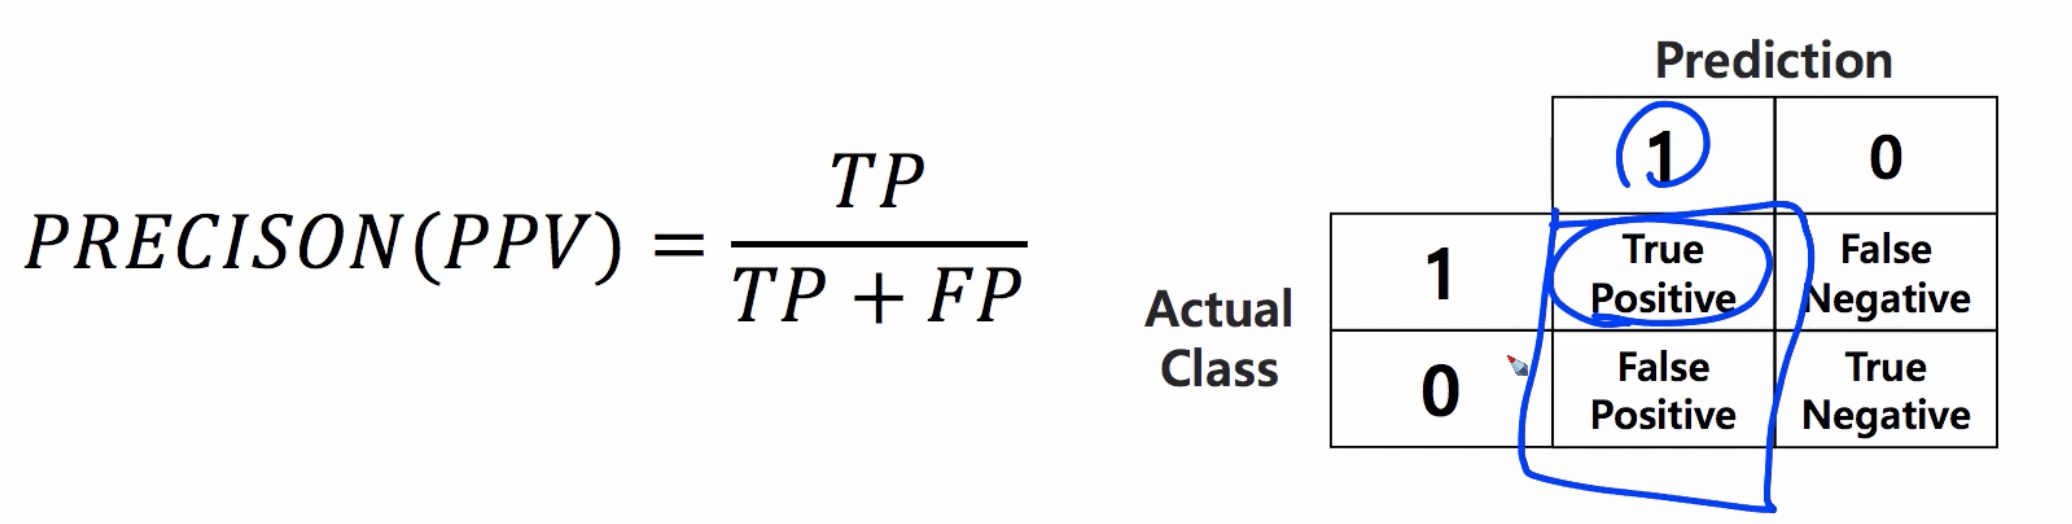

In [7]:
from sklearn.metrics import precision_score

y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [8]:
sum((y_pred == 1) & (y_pred == y_true)) / sum(y_pred)

0.5

In [9]:
precision_score(y_true, y_pred)

0.5

In [10]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
confusion_matrix(y_true, y_pred)   # row : Actual , column : Prediction

array([[2, 0, 0],
       [1, 0, 1],
       [0, 2, 0]])

In [11]:
precision_score(y_true, y_pred, average = 'macro')     # label별 개별값들 합의 평균 = "None"값들의 전체 합 / 전체 label 개수

0.2222222222222222

In [12]:
precision_score(y_true, y_pred, average = 'micro')     # 전체 평균(= 맞춘 개수 / 전체 개수)

0.3333333333333333

In [13]:
precision_score(y_true, y_pred, average = None)        # 평균이 아니라 각각 label별로 Precision 계산

array([0.66666667, 0.        , 0.        ])

### 민감도(Recall, Sensitivity, True Positive Rate)
- 실제 긍정 데이터 중 긍정이라고 예측한 비율, 반환율, 재현율
- 얼마나 잘 긍정(ex. 암)이라고 예측하였는가?
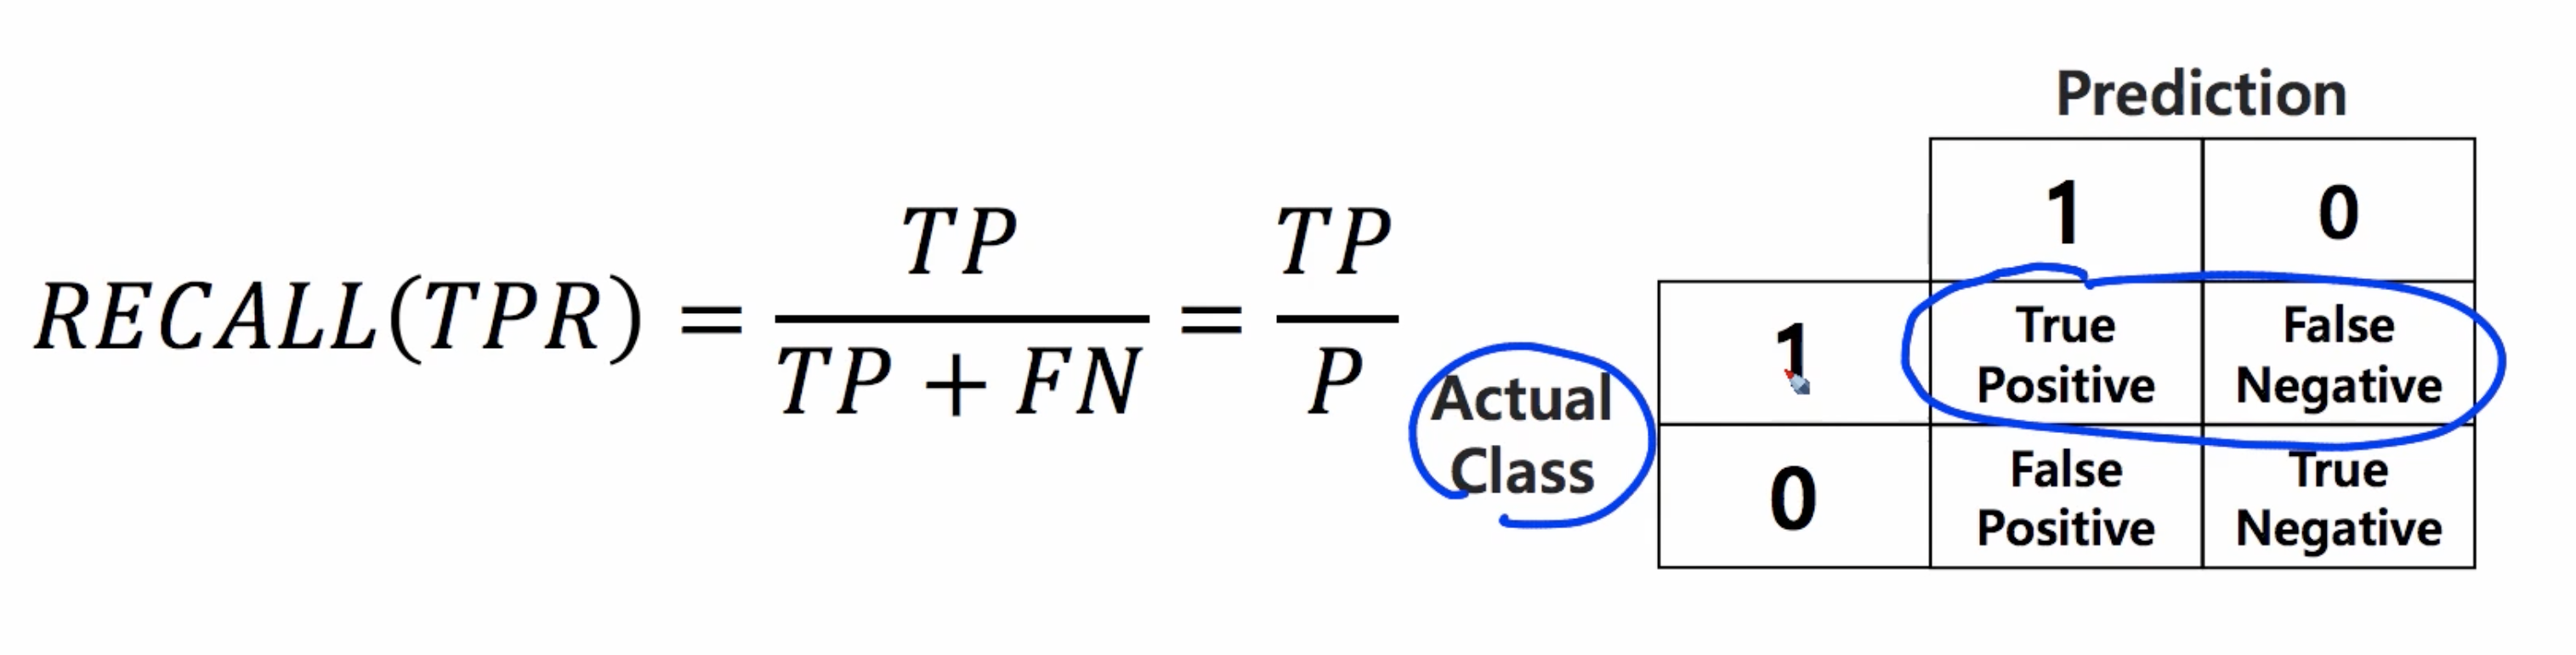

### 특이성(Specificity, True Negative Rate)
- 잘 사용되지는 않고, 참고용. Recall과 반대개념
- 부정을 얼마나 잘 부정이라고 인식해내는가?
- 전체 부정 중 부정을 정확히 찾아낸 비율
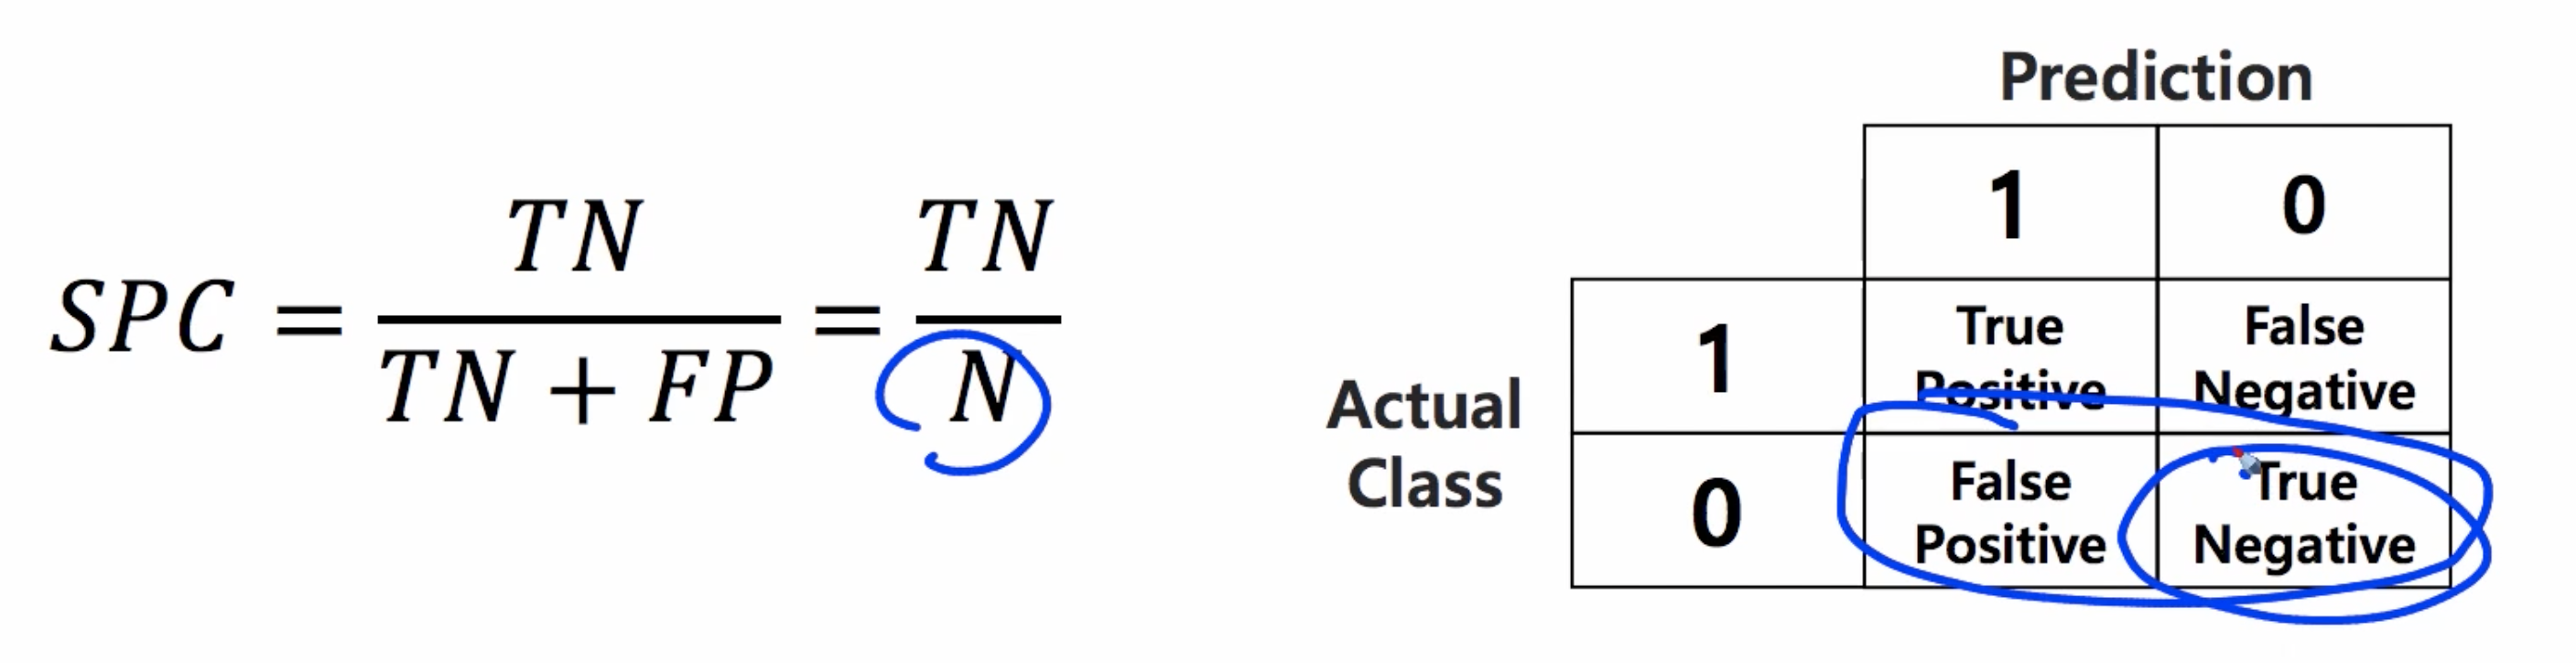

In [14]:
from sklearn.metrics import recall_score

y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [15]:
sum((y_true == 1) & (y_pred == y_true)) / sum(y_true)

1.0

In [16]:
recall_score(y_true, y_pred)

1.0

In [17]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average = 'macro')

0.3333333333333333

In [18]:
recall_score(y_true, y_pred, average = 'micro')

0.3333333333333333

In [19]:
recall_score(y_true, y_pred, average = None)

array([1., 0., 0.])

### F1 Score(F-measure, F-score)
- Precision과 Recall을 통합한 측정지표
- Precision과 Recall의 <b>조화평균</b>
- Precision과 Recall이 서로 trade-off 관계에 있기 때문
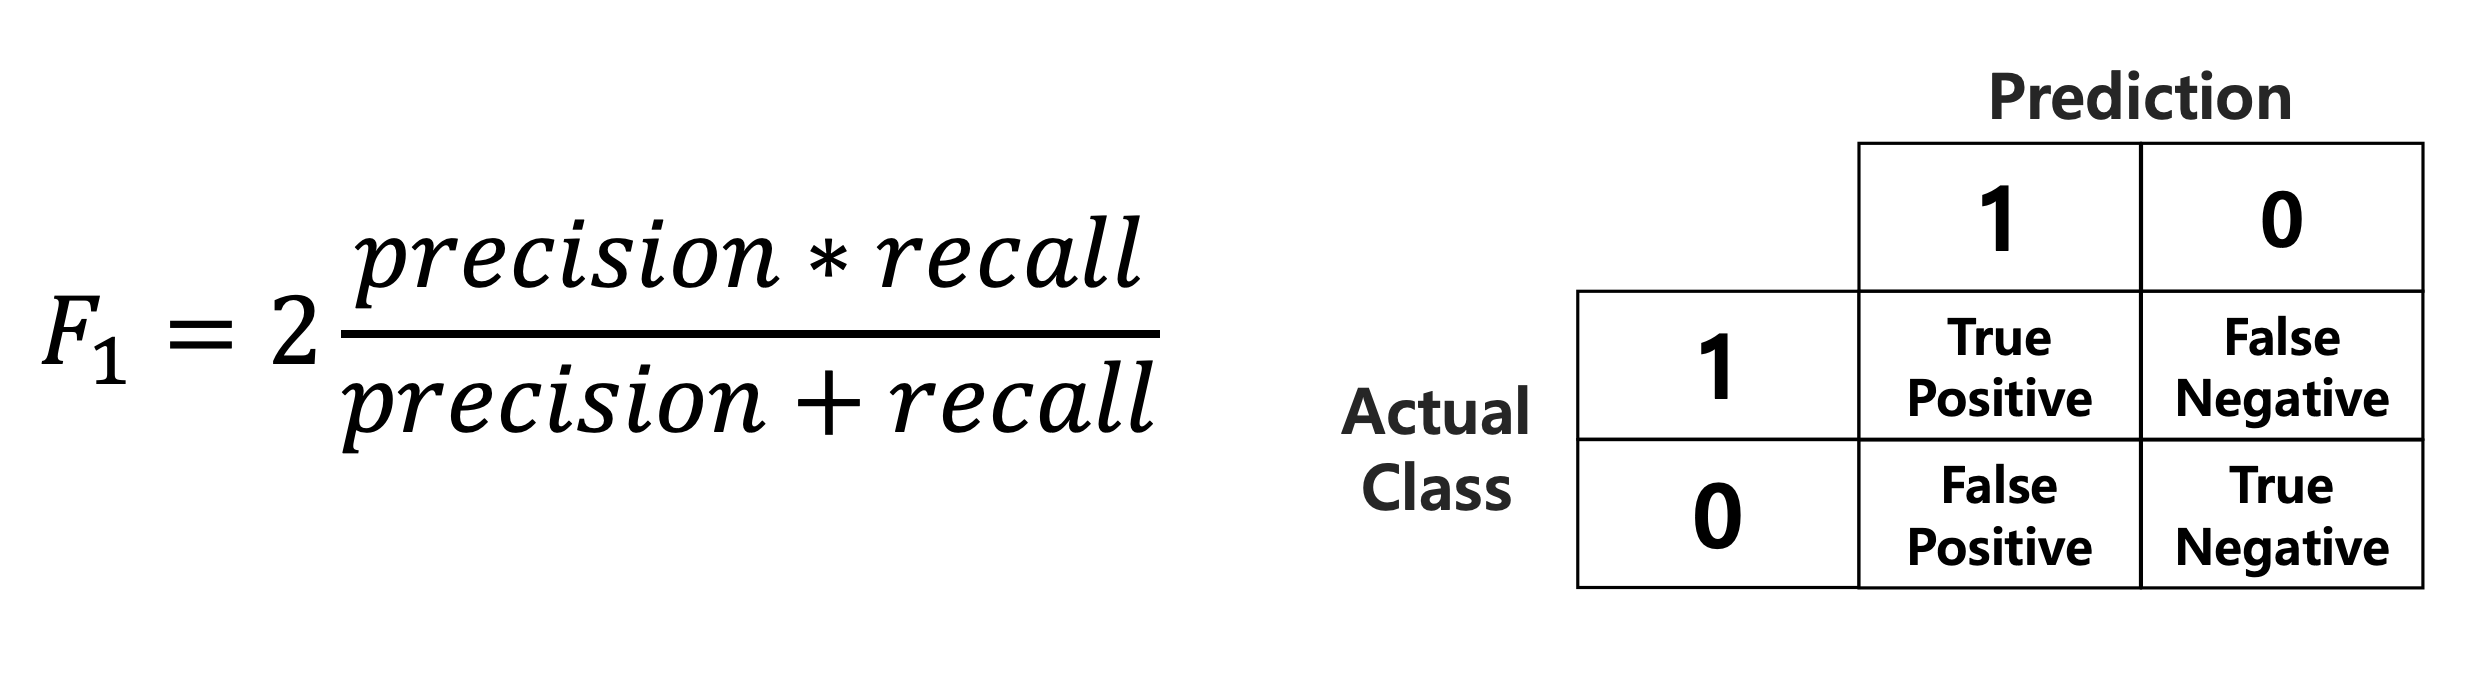

In [20]:
from sklearn.metrics import f1_score

y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

pre = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)

In [21]:
2 * (pre * rec) / (pre + rec)

0.6666666666666666

In [22]:
f1_score(y_true, y_pred)

0.6666666666666666

In [23]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average = 'macro')

0.26666666666666666

In [24]:
f1_score(y_true, y_pred, average = 'micro')

0.3333333333333333

In [25]:
f1_score(y_true, y_pred, average = None)

array([0.8, 0. , 0. ])

### Examples

### Precision - Recall Curve
- 예측 확률 Threshold를 변화시켜 Precision/Recall 측정
- 시각화할 때 유용하게 사용가능

In [26]:
from sklearn.metrics import precision_recall_curve

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])    # Prediction Score
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [27]:
precision

array([0.66666667, 0.5       , 1.        , 1.        ])

In [28]:
recall

array([1. , 0.5, 0.5, 0. ])

In [29]:
thresholds    # Positive가 되는 비율

array([0.35, 0.4 , 0.8 ])

(0.0, 1.05)

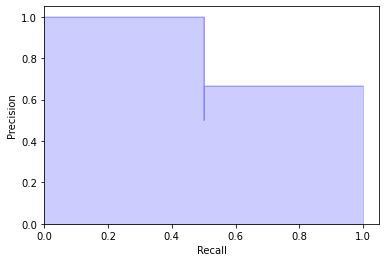

In [30]:
import matplotlib.pyplot as plt

plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
plt.fill_between(recall, precision, step = 'post', alpha = 0.2, color = 'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])

### Precision - Classification Report
- Classification 문제에서 한번에 Precision, Recall, F1 결과 출력
- Binary보다는 Multiclass일 때 주로 사용
- Class 0 ~ Class 2에 나오는 값 : "macro"
- avg / total : "micro"
- support : y_true의 개수

In [31]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

